In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#!pip3 install matplotlib
#!pip3 install opencv-python

In [6]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL



# Image agumentation and preprocessing
1.rescaling 

2.vertical and horizontal flip

3.zoom range

In [3]:
training_data_generator=ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
# aumentation of the training dataset 

train_dir=r"C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Train"
test_dir= r"C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Test"

#augumentation of train and resizing- target size
train=training_data_generator.flow_from_directory(train_dir,target_size=(256,256),shuffle = True,color_mode='rgb',class_mode='categorical')

Found 1814 images belonging to 2 classes.


In [5]:
#resizing of test dataset
validation_datagen = ImageDataGenerator(rescale = 1./255)
test=validation_datagen.flow_from_directory(test_dir ,target_size=(256, 256))

Found 201 images belonging to 2 classes.


# CNN Model building 

sequential model with 3 layers using reLU

In [13]:
#initilizing cnn
#input
cnn=tf.keras.models.Sequential()

#hidden layers

#first layer
#convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=[256,256,3]))
#max pooling- decreasing the size of images by extraxting only the required features from the image
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#second layer
#convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=42,kernel_size=3,padding='valid',activation='relu'))
#max pooling- decreasing the size of images by extraxting only the required features from the image
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#third layer
#convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))
#max pooling- decreasing the size of images by extraxting only the required features from the image
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [14]:
# flattening and fully connected layer
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#output layer- activation here is either sigmoid(binary) or softmax(categorical)
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 125, 125, 42)      12138     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 42)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 60, 60, 64)        24256     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

# Training the model

## cnn model with Adam optimizer

In [16]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model-5.h5', mode='max', monitor='val_acc',save_best_only=True,verbose=1,save_freq='epoch')

callbacks=[checkpoint]

In [17]:
# compile and train
#optimizer to reduce the errors,
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

In [18]:
cnn.fit(train,epochs=20,validation_data=test,callbacks=callbacks)

Epoch 1/20
57/57 [==============================] - 127s 2s/step - loss: 0.5141 - acc: 0.7795 - val_loss: 0.5143 - val_acc: 0.7512

Epoch 00001: val_acc improved from -inf to 0.75124, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model-5.h5
Epoch 2/20
57/57 [==============================] - 126s 2s/step - loss: 0.3327 - acc: 0.8627 - val_loss: 0.5582 - val_acc: 0.8259

Epoch 00002: val_acc improved from 0.75124 to 0.82587, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model-5.h5
Epoch 3/20
57/57 [==============================] - 112s 2s/step - loss: 0.2742 - acc: 0.8914 - val_loss: 0.5684 - val_acc: 0.8010

Epoch 00003: val_acc did not improve from 0.82587
Epoch 4/20
57/57 [==============================] - 111s 2s/step - loss: 0.2670 - acc: 0.8975 - val_loss: 0.4129 - val_acc: 0.8458

Epoch 00004: val_acc improved from 0.82587 to 0.84577, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model-5

## inception v3 with Adam optimizer

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout


input_tensor = Input(shape=(256, 256, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model_6.h5', mode='max', monitor='val_acc',save_best_only=True,verbose=1,save_freq='epoch')

callbacks=[checkpoint]

history = model.fit(
    train,
    #steps_per_epoch = 14,
    epochs = 20,
    validation_data = test,
    #validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
57/57 [==============================] - 147s 2s/step - loss: 0.5087 - acc: 0.8848 - val_loss: 0.0988 - val_acc: 0.9652

Epoch 00001: val_acc improved from -inf to 0.96517, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model_6.h5
Epoch 2/20
57/57 [==============================] - 138s 2s/step - loss: 0.0754 - acc: 0.9741 - val_loss: 0.0657 - val_acc: 0.9801

Epoch 00002: val_acc improved from 0.96517 to 0.98010, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model_6.h5
Epoch 3/20
57/57 [==============================] - 134s 2s/step - loss: 0.0777 - acc: 0.9702 - val_loss: 0.0607 - val_acc: 0.9801

Epoch 00003: val_acc did not improve from 0.98010
Epoch 4/20
57/57 [==============================] - 137s 2s/step - loss: 0.0448 - acc: 0.9818 - val_loss: 0.0681 - val_acc: 0.9851

Epoch 00004: val_acc improved from 0.98010 to 0.98507, saving model to C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model_6

# checking the performance of the models with some images

In [23]:
model_inception = tf.keras.models.load_model(r"C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model_6.h5")
model_cnn= tf.keras.models.load_model(r"C:\Users\perik\Desktop\major\fire-detection-master\model\acc_model-5.h5")
model=[model_cnn,model_inception]

def checking(img_dir,model_number):
    image_show=PIL.Image.open(img_dir)
    plt.imshow(image_show)
    img=image.load_img(img_dir,target_size=(256,256))
    img=image.img_to_array(img)
    #rescale
    img=img/255
    img=np.expand_dims(img,axis=0)
    model_implemented=model[0]
    if model_number==1:
        model_implemented=model[1]
    result = np.argmax(model_implemented.predict(img), axis=-1)
    if result==0:
        print('fire')
    else:
        print('no fire')



cnn model with adam optimizer:

fire


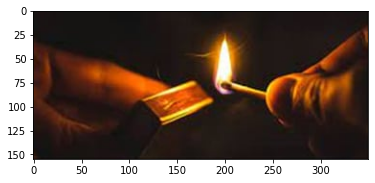

In [25]:
#evaluating the model
#fire image
print('cnn model with adam optimizer:\n')
img1=r'C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Train\Fire\image_910.jpg'
checking(img1,0)


fire


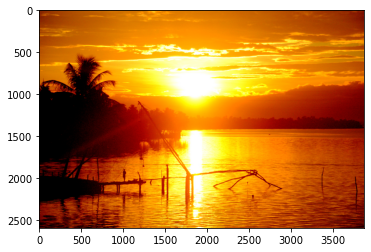

In [27]:
img2=r'C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Test\Neutral\image_100.jpg'
checking(img2,0)

inceptionV3 model with adam optimizer:

fire


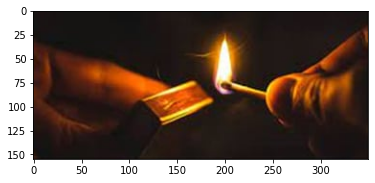

In [28]:
print('inceptionV3 model with adam optimizer:\n')
img1=r'C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Train\Fire\image_910.jpg'
checking(img1,1)


no fire


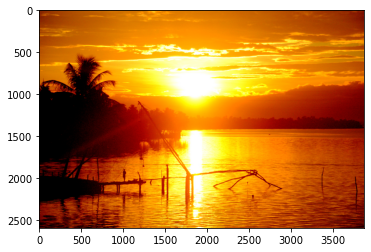

In [29]:
img2=r'C:\Users\perik\Desktop\major\fire-detection-master\Dataset 3\Test\Neutral\image_100.jpg'
checking(img2,1)